# Module 1 - Binary Classification

In this module you will explore some different classification techniques. By the end of this module you will be able to:

- Identify and apply different classification models
- Identify different scoring metrics
- Compare the results from different classification models.

In [1]:
# Before we start, let's import our main packages
import pandas as pd
import numpy as np

**Data**

For this module, we will use a dataset containing the diagnostic of multiple Breast Cancer tests in Wisconsin. More information about this dataset can be found in the following [link](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

Let's start by creating our df and doing some data pre-processing.

In [2]:
# Loading df
df = pd.read_csv("datasets/wdbc.data", header=None)
df.columns = ['ID', 'Diagnosis'] + [f'Feature {i}' for i in range(2, len(df.columns))]
# As our target is to predict Malign cancer, we are going to set M in Diagnosis as 1 and Benign as 0
df["Diagnosis"] = np.where(df["Diagnosis"] == "M",1,0)
df

,ID,Diagnosis,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# We need to create our training and testing df's. We are going to use a conventional 80-20 split. 
from sklearn.model_selection import train_test_split
X = df.drop(["ID","Diagnosis"],axis=1)
y = df["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=14)

## Classification

We will start by applying some classification algorithms and evaluate their performance. 

### SVM

This algorith attempts to find the hyperplane that better separates the data. To learn more about the model and methods used in the following lines of code, you can go to the [source documentation](https://scikit-learn.org/stable/modules/svm.html).

In [4]:
# Import out model class from the source library
from sklearn import svm
# Creating our svm classifier
svm_clf = svm.SVC()
# Fitting our model
svm_clf.fit(X_train, y_train)
# Predictions
svm_predictions = svm_clf.predict(X_test) 

### Gradient Boosting Classifier

Now, let's fit a booster classifier. To learn more about the model and methods used in the following lines of code, you can go to the [source documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [5]:
# Import out model class from the source library
from sklearn.ensemble import GradientBoostingClassifier 
# Creating our GB classifier
gb_clf = GradientBoostingClassifier() 
# Fitting our model
gb_clf.fit(X_train, y_train)
# Predictions 
gb_predictions = gb_clf.predict(X_test)

## Regression

### Logistic Regression

Now, let's proceed with a Logistic Regression approach. In this model, we are estimating a coefficient for each of the features that we are using to explain the 

In [6]:
# Import out model class from the source library
from sklearn.linear_model import LogisticRegression 
# Creating our LR classifier
lr_clf = LogisticRegression(max_iter=1800)
# Fitting our model
lr_clf.fit(X_train, y_train)
# Predictions 
lr_predictions = lr_clf.predict(X_test)

## Evaluating our models

So far we have made predictions used 3 different model approaches. How do we know which model did a better job in predicting our target value? There are two metrics we are going to put attention to:

- **Accuracy:** This metric tells us the ratio of good predictions, by dividing the number of correctly predicted values over the total observed values. In formula terms:
$$
A = \frac{TruePositives + TrueNegatives}{TruePositives+TrueNegatives+FalsePositives+FalseNegatives}
$$

- **Precision:** In this metric we are only putting attention to the ability of our models to predict the positives, by dividing the number of correct positives over the number of totally predicted positives. In formula terms:
$$
P = \frac{TruePositives}{TruePositives+FalsePositives}
$$

Now we are going to compare our three classification models by using these metrics. 

In [7]:
from sklearn.metrics import accuracy_score, precision_score

# SVM
svm_accuracy = round(accuracy_score(y_test,svm_predictions),2)
svm_precision = round(precision_score(y_test, svm_predictions),2)

# GB
gb_accuracy = round(accuracy_score(y_test,gb_predictions),2)
gb_precision = round(precision_score(y_test, gb_predictions),2)

# LR
lr_accuracy = round(accuracy_score(y_test,lr_predictions),2)
lr_precision = round(precision_score(y_test, lr_predictions),2)

print(f"SVM Accuracy: {svm_accuracy*100}%")
print(f"SVM Precision: {svm_precision*100}%\n")
print(f"GB Accuracy: {gb_accuracy*100}%")
print(f"GB Precision: {gb_precision*100}%\n")
print(f"LR Accuracy: {lr_accuracy*100}%")
print(f"LR Precision: {lr_precision*100}%")

SVM Accuracy: 92.0%
SVM Precision: 100.0%

GB Accuracy: 96.0%
GB Precision: 97.0%

LR Accuracy: 96.0%
LR Precision: 97.0%


Another approach to compare our results it's the use of a **confusion matrix**. A confusion matrix is a type of visualization in which which we can compare the predicted labels of our model and compare them with the true label

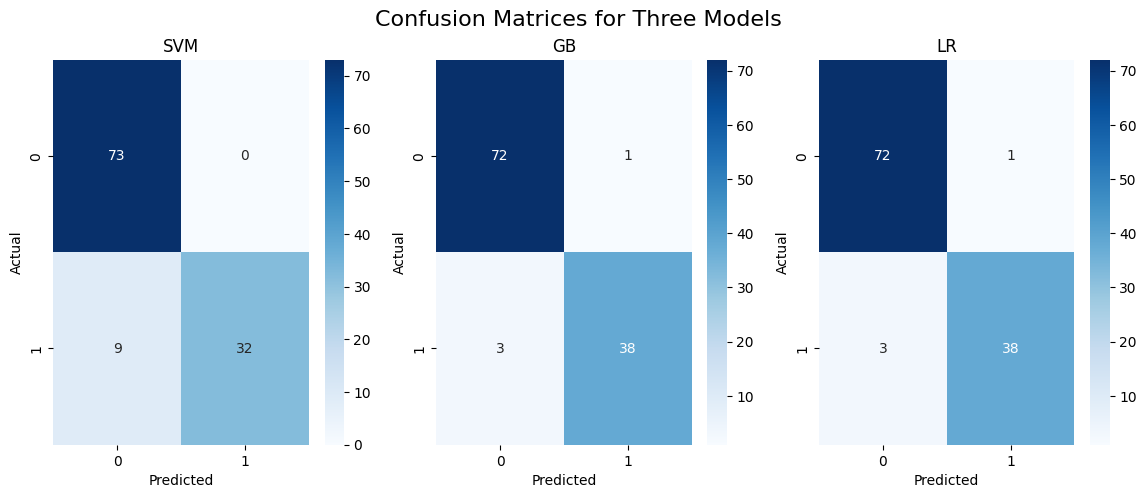

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

models = ["SVM", "GB", "LR"]
predicted_labels = [svm_predictions, gb_predictions, lr_predictions]
true_labels = [y_test, y_test, y_test]

# Create a grid for displaying confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle("Confusion Matrices for Three Models", fontsize=16)

for i, ax in enumerate(axes):
    cm = confusion_matrix(true_labels[i], predicted_labels[i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(models[i])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.show()

As we can notice, the three models perform quite similar, with 2 of them showing identical results in terms on how the predictions are distributed. While our SVM showed a precision of 100%, it is important to notice that it missed to properly predict 3 positive tests, which led to a lowered accuracy compared to our other 2 models.

## Hands-on

Now it's your turn to test the models that we have covered and so far and compare their performance on a different dataset. For this task, you are going to use a different dataset. 

Your tasks are the following:

1. Load the dataset and perform any necessary analysis, cleaning and pre-processing.
2. Fit each of the 3 models we covered in this module.
3. Evaluate the 3 models.

In [9]:
# Your code here
